#Cohen's Congress example

##What this is about

In 1994 Jacob Cohen argued that the reliance on p-values in psychology is a bad thing ([Cohen, J. The earth is round (p<.05). American Psychologist, 1994, 49, 997-1003](http://dx.doi.org/10.1037/0003-066X.49.12.997)). In his argument he used the following to exemplify that the logic of null hypothesis significance testing is wrong:

> If a person is an American, then he is probably not a member of Congress.
> This person is a member of Congress.

> Therefore, he is probably not an American.

Cohen's point was that the conclusion in this example, although it follows the [modus tollens](https://en.wikipedia.org/wiki/Modus_tollens) in logic, is not sensible. At the same time, the structure of the example is exactly that of null hypothesis significance testing:

> If H0 is true, then this result (statistical significance) would probably not occur.
> This result has occurred.

> Then H0 is probably not true and therefore formally invalid.

In the discussion associated with the article Baril and Cannon criticised this example as "a particularly artificial and irrelevant illustration".

Here, we'll explore why Baril and Cannon came to this conclusion by framing Cohen's example properly with probabilities. Actually, [Edwin Thompson Jaynes](https://en.wikipedia.org/wiki/Edwin_Thompson_Jaynes) (Jaynes, E. T. Probability Theory: The Logic of Science. Cambridge University Press, 2003, ch. 1, [@Google books](http://books.google.de/books?id=tTN4HuUNXjgC)) provided a nice introduction to the extension of logic with probabilities and already pointed out that the modus tollens does not apply, when the implication (if A then B) is uncertain.

##Formalising the Congress example

We can formalise the example using binary random variables. Especially we define

$A \in \{0, 1\} :=$ whether a person is a citizen of the USA (American)

$B \in \{0, 1\} :=$ whether a person is a member of the Congress of the USA

These random variables can take truth values 0 and 1 such that when, e.g., $A = 0$ a person is not an American and when $A = 1$ a person is an American. We can now make intuitive guesses about the probabilities which implement Cohen's example.

###Likelihood

To state that "If a person is an American, then he is probably not a member of Congress." we can set the probability of $K=0$ given $A=1$ to a very high value (this should actually just be the number of members of Congress divided by the number of Americans, but we choose 0.99 out of convenience):

$$P(K=0|A=1) = 0.99.$$

Additionally, we need the probability of not being in Congress under the premise that a person is not American which should be 1, but we allow for some, very unlikely mistakes and set it to:

$$P(K=0|A=0) = 0.9999999$$

These two probabilities fully specify the likelihood $P(K|A)$, because $P(K=1|A) = 1 - P(K=0|A)$ irrespective of the value of $A$. Now store these probabilities in Python variables

In [1]:
pnotKA = 0.99
pnotKnotA = 0.9999999

###Prior

To specify the full probabilistic model we need to set the prior probability of a person being American. Of course, this depends on the group of people you consider. We take the whole world and use estimates of 300 million Americans vs. 6 billion people on earth:

In [2]:
pA = 300.0 / 6000.0
print pA

0.05


###Posterior

In his example, Cohen is interested in the plausibility of the statement that a person is not an American given that he is in Congress. We can now compute this posterior probability of $A$ given $K$ by applying Bayes' formula:

$$P(A|K) = \frac{P(K|A)P(A)}{P(K)}.$$

###Marginal likelihood

We see that the posterior depends on the probability $P(K)$ which is the so-called *marginal likelihood* and can be computed from the generative model $P(K|A)P(A)$ by *marginalising* variable $A$. *Marginalising* means that you remove all dependencies on $A$ from the model by summing all probabilities of $K$ under all possible hypotheses about $A$ weighted by the prior probabilities that these hypotheses are true. Here, there are two possible hypotheses: $A=0$ and $A=1$ leading to the following equation

$$P(K) = P(K|A=1)P(A=1) + P(K|A=0)p(A=0).$$

As we have above defined the probabilities $P(K=0|A)$ in Python, we now can easily compute $P(K=0)$:

In [3]:
pnotK = pnotKnotA * (1-pA) + pnotKA * pA
print pnotK

0.999499905


###Final probability

Finally, we can calculate the posterior probability of not being American under the information that a person is a member of Congress which represents the plausibility of the last sentence in Cohen's Congress example (notice that I plug the appropriate truth values for variables $A$ and $B$, i.e., 0 or 1, into the Bayes' formula above):

In [4]:
pKnotA = 1 - pnotKnotA
pnotAK = pKnotA*(1-pA) / (1-pnotK)
print pnotAK

0.000189963906758


##Conclusion

We see that the plausibility is very low, as it should be when we simply stick with our intuition. It is clear that we cannot apply modus tollens in this situation, but probability theory, which extends binary logic, leads to sensible inferences, just as Jaynes had already pointed out. 

##Null hypothesis significance testing

Cohen's main point with this example was that people have incorrect intuitions about p-values and null hypothesis significance testing. Especially, Cohen wanted to point out that it is not a sensible conclusion to reject $H_0$ based on the low probability of the data under the assumption that $H_0$ is true. The computed probability `pnotAK` above is exactly the probability with which that conclusion would be true. In Cohen's example this is extremely low, but does this example actually reflect the typical situation in null hypothesis significance testing? Baril and Cannon argued against this.

So let's replace the particulars of the Congress example with typical values from null hypothesis significance testing. First, let's get clear about what $A$ and $K$ mean here

$A = 1$ := $H_0$ is true

$K = 1$ := test is significant

Test statistics are usually defined by two important quantities: the significance level of a test, $\alpha$, and the power of a test, $1-\beta$ where $\alpha$ is the false positive rate, i.e., the probability of rejecting $H_0$ although it is true, and $\beta$ is the false negative rate, i.e., the probability of accepting $H_0$ although it is false. $H_0$ is rejected when the test is significant, i.e., $K=1$. $\alpha$ is often set to 0.01 such that

In [5]:
pKA = 0.01
pnotKA = 1 - pKA
print pnotKA

0.99


Whereas $\alpha$ is usually fixed to a given value, it is hard to get a good estimate of the underlying power of a test, because it depends on size of the effect under study which is unknown. [Button et al. (2013)](http://dx.doi.org/10.1038/nrn3475) have done a meta-analysis of studies in neuroscience and have found median estimated powers of 8-31%. Let's be positive and take the upper limit of these values such that $\beta=0.69$:

In [13]:
pnotKnotA = 0.69

Finally, we need an estimate of the prior probability with which $H_0$ is true. Obviously this is not known and it depends on the skill of the researcher to generate sensible hypotheses. I would guess that across all possible scientific hypotheses the by far largest number of considered hypotheses are false. Because $H_0$ is often taken to be the opposite of the actual hypothesis under consideration, my guess corresponds to $p(A=1) \gg 0.9$. But let's remain positive and assume a researcher with great skill whose hypotheses have a 50/50 chance of being true:

In [14]:
pA = 0.5

Now I can compute the posterior probability of correctly rejecting the null hypothesis by using the same equations as before:

In [15]:
pnotK = pnotKnotA * (1-pA) + pnotKA * pA
pKnotA = 1 - pnotKnotA
pnotAK = pKnotA*(1-pA) / (1-pnotK)
print pnotAK

0.96875


Say what? Null hypothesis significance testing works!? The posterior of correctly rejecting $H_0$ is a little bit smaller than the original $\alpha$, but it's still reasonably close! That was exactly the point Baril and Cannon made in their reply to Cohen. The examples are only extreme cases. In typical situations, null hypothesis significance testing is not so bad. Well, that's comforting. Also, there must be a reason why it stuck around for so long and is loved by so many. But, wait, what if the prior probability of hypotheses being true is not 0.5? That was the most uncertain quantity in our calculations. Here is some code which plots the probability of correctly rejecting $H_0$ based on different values of $P(A=1)$:

Populating the interactive namespace from numpy and matplotlib


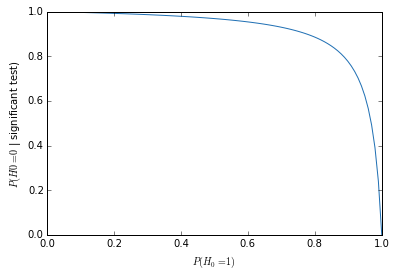

In [16]:
# import numpy and matplotlib and allow for inline plots
%pylab --no-import-all inline

# make a range of prior probabilities
pA = np.linspace(0.0, 1.0, 100)

# compute posterior with previous assumptions
pnotK = pnotKnotA * (1-pA) + pnotKA * pA
pKnotA = 1 - pnotKnotA
pnotAK = pKnotA*(1-pA) / (1-pnotK)

# plot results
ax = plt.axes()
ax.plot(pA, pnotAK, color=plt.cm.Blues(0.75));
ax.set_xlabel('$P(H_0=1)$');
ax.set_ylabel('$P(H0=0$ | significant test)');

The plot shows that the entire validity of null hypothesis significance testing hinges on the prior probability with which the null hypothesis is true, i.e., the researchers ability to identify sensible hypotheses. For less likely scientific hypotheses ($P(H_0=1) \rightarrow 1$) it is also less likely that they are true, despite a significant test. For example, if only 1 in 10 of the questions researchers pose about their data turn out to be true on average, a significant test only suggests a probability that the corresponding hypothesis is true of:

In [10]:
print "p(H0=1)=%4.2f then p(H0=0|significant test)=%4.2f" % (pA[89], pnotAK[89])

p(H0=1)=0.90 then p(H0=0|significant test)=0.78


**How many of your hypotheses have turned out to be true in the past?** Remember, I don't mean how often your tests turned out to be significant.

There was another uncertain quantity in our computations: the typical power of tests. [Button et al. (2013)](http://dx.doi.org/10.1038/nrn3475) estimated a very low median power of studies in neuroscience of 8-31% and argued that this was a bad thing, because it leads to irreproducable results. Baril and Cannon, on the other hand, argued the opposite, saying that the typical low power of studies prevents us from finding trivial, i.e., tiny effects with null hypothesis significance testing. They gave an estimate of power for medium sized effects in psychology of 0.57 (see [Rossi, 1990](http://dx.doi.org/10.1037/0022-006X.58.5.646)). With ever increasing sample sizes, e.g., from online surveys, it is also possible to achieve very high powers of, let's say, 0.9. What happens to the probability of correctly rejecting a null hypothesis then? To check this we just replot the curve above for all the values mentioned here:

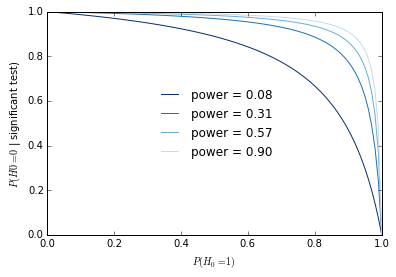

In [11]:
# betas corresponding to different values of power
pnotKnotA = 1 - np.array([[0.08, 0.31, 0.57, 0.9]]).transpose()
nump = pnotKnotA.shape[0]

# compute posterior with previous assumptions
pnotK = pnotKnotA * (1-pA) + pnotKA * pA
pKnotA = 1 - pnotKnotA
pnotAK = pKnotA*(1-pA) / (1-pnotK)

# plot results
ax = plt.axes()
ax.set_color_cycle( plt.cm.Blues_r(np.linspace(0, 0.75, nump)) )
ax.plot(pA, pnotAK.transpose());

# text labels
ax.set_xlabel('$P(H_0=1)$');
ax.set_ylabel('$P(H0=0$ | significant test)');
ax.legend( ["power = %4.2f" % x for x in 1-pnotKnotA.flatten()], 
           loc='center', frameon=False );

The posterior probability of correctly rejecting the null hypothesis increases with power. This is what Button et al. (2013) mean when they say that low power leads to low reproducability of results. Baril and Cannon's (and Cohen's) point is that with high power you really need to take care to come up with sensible hypotheses, because you'll correctly reject your null hypothesis for tiny effects that may not mean anything, or may mean something very different from what you are actually interested in, e.g., some unforeseen, tiny, but reliable property of your particular sample of data.

###Lessons learnt

In sum, Cohen's Congress example has taught us that we can trust probability theory in making sensible inferences in uncertain situations. Especially, probability theory helps us to understand the circumstances under which our decisions about scientific findings hold and when they don't. We have seen that decisions based on null hypothesis significance testing can be reliable, but all depends on the prior probability with which a considered hypothesis is true.